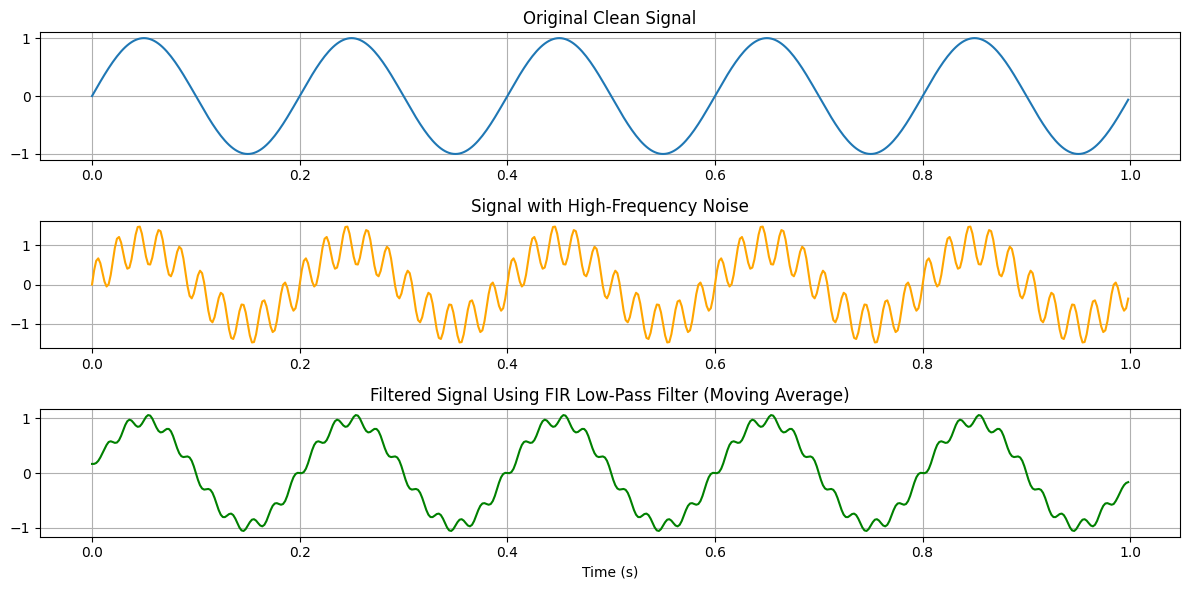

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a signal with high-frequency noise
fs = 500             # Sampling rate (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of data

# Clean low-frequency signal (e.g., 5 Hz sine wave)
signal_clean = np.sin(2 * np.pi * 5 * t)

# High-frequency noise (e.g., 50 Hz sine wave)
noise = 0.5 * np.sin(2 * np.pi * 50 * t)

# Noisy signal
signal_noisy = signal_clean + noise

# Step 2: Design a simple FIR low-pass filter (moving average filter)
N = 15  # Filter length (odd number preferred)
h = np.ones(N) / N  # Moving average kernel

# Step 3: Convolve filter with noisy signal
signal_filtered = np.convolve(signal_noisy, h, mode='same')  # 'same' keeps output size

# Step 4: Plot results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal_clean, label='Clean Signal')
plt.title("Original Clean Signal")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, signal_noisy, label='Noisy Signal', color='orange')
plt.title("Signal with High-Frequency Noise")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, signal_filtered, label='Filtered Signal', color='green')
plt.title("Filtered Signal Using FIR Low-Pass Filter (Moving Average)")
plt.xlabel("Time (s)")
plt.grid(True)

plt.tight_layout()
plt.show()


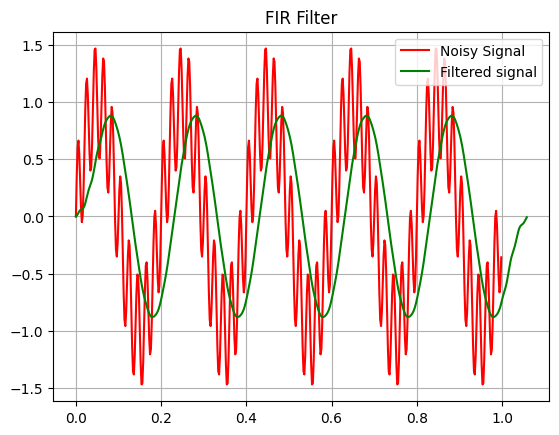

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fs = 500
t = np.arange(0,1,1/fs)
x =  np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*50*t)

def convolution(x,h):
    len_x = len(x)
    len_h= len(h)
    len_y = len_x+len_h-1
    y = []
    for n in range(len_y):
         sum=0
         for k in range(len_h):
              if 0<=n-k<len_x:
                   sum+=h[k]*x[n-k]
         y.append(sum)
    return y
def hanning(N):
     n = np.arange(N)
     return 0.5-.05*np.cos(2*np.pi*n/N-1)

def lowpassfilter(N,fc,fs):
     n = np.arange(N)
     h = np.sinc(2*fc*(n-((N-1)/2))/fs)*hanning(N)
     h/=np.sum(h)
     return h
h = lowpassfilter(N=31,fc=10,fs=fs)
y = convolution(x,h)
t1 = np.arange(len(y))/fs

plt.plot(t,x,label="Noisy Signal",color='r')
plt.plot(t1,y,label="Filtered signal",color="g")
plt.title("FIR Filter")
plt.grid(True)
plt.legend()
plt.show()